# Importing Visualization Libraries

In [3]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
#Setting the path variable to use for the scripts 
path = r'C:\Users\Arjun\Desktop\Career Foundry\Airbnb'

In [5]:
path

'C:\\Users\\Arjun\\Desktop\\Career Foundry\\Airbnb'

In [6]:
#First, lets check the matplotlib version, to avoid problems in the Visualization
matplotlib.__version__

'3.6.3'

In [7]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
#Importing the cleaned data set from the last Exercise
df_listings_cleaned = pd.read_csv(os.path.join(path,'Data','Prepared Data','listings_wrangled.csv'), index_col = False)

In [9]:
#Checking the imported dataset
df_listings_cleaned.head()

,Unnamed: 0,airbnb_listing_id,airbnb_listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [10]:
#Dimensions of the dataset
df_listings_cleaned.shape

(20030, 16)

In [11]:
#First, lets remove the Unnamed column
df_listings_cleaned.drop(columns = ['Unnamed: 0'], inplace = True)

In [12]:
#Validating the dataset
df_listings_cleaned.head()

,airbnb_listing_id,airbnb_listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [13]:
df_listings_cleaned.columns

Index(['airbnb_listing_id', 'airbnb_listing_name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Relationships

**Correlation matrix**

In [26]:
# Taking the subset of the cleaned data set
df_sub = df_listings_cleaned[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']]

In [27]:
#Creating a correlation matrix using Pandas
df_sub.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,0.039119,-0.067417,-0.069898,0.159293
minimum_nights,0.039119,1.000000,-0.022019,-0.033772,0.059486
number_of_reviews,-0.067417,-0.022019,1.000000,0.639888,0.252856
reviews_per_month,-0.069898,-0.033772,0.639888,1.000000,0.263080
availability_365,0.159293,0.059486,0.252856,0.263080,1.000000


In [28]:
df_sub.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')

In [29]:
df_sub.shape[1]

5

In [16]:
#Checking the current working dir
cwd = os.getcwd()
cwd

'C:\\Users\\Arjun'

In [65]:
os.chdir(path)

In [66]:
cwd = os.getcwd()
cwd

'C:\\Users\\Arjun\\Desktop\\Career Foundry\\Airbnb'

Text(0.5, 1.0, 'Correlation Matrix')

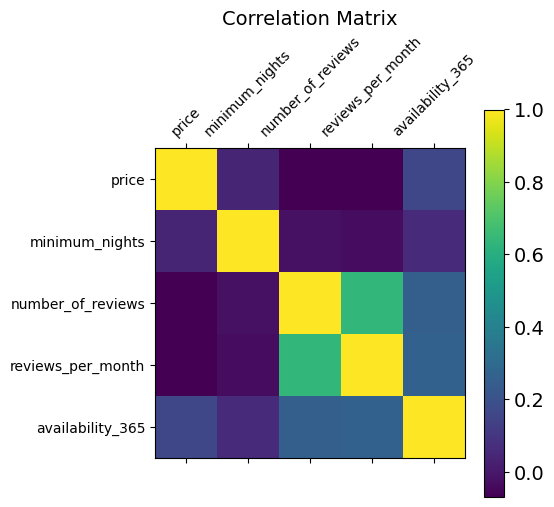

In [31]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(5, 5)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title


**Correlation Matrix heatmap**

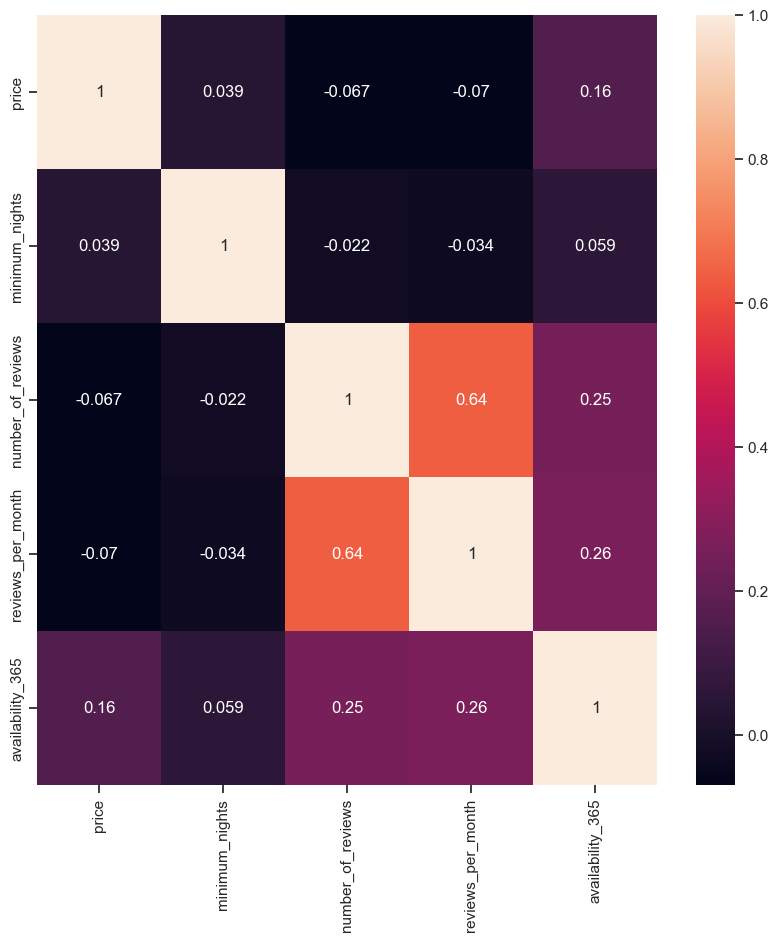

In [69]:
#Using the seaborn library,creating the correlation heatmap
#First, letsCreate a subplot with matplotlib and then, lets create the heatmap with annotations
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)
corr.figure.savefig(os.path.join(path,'Visualizations','correlation_matrix_heatmap.png'), bbox_inches='tight')

**Explanation**

As we can see from the heatmap, there is a moderate relationship between price and availability, number of reviews. There is a strong relationship between number of reviews and monthly reviews as expected. We should need to explore further to see if there is a confounding factor within these correlation relationships. Also, there is a slight negative relationship between price and number of reviews per month. This is quite confusing - because the expected understanding of Airbnb model stresses the need of having number of reviews in determining the price for hosts.

**Scatterplots**

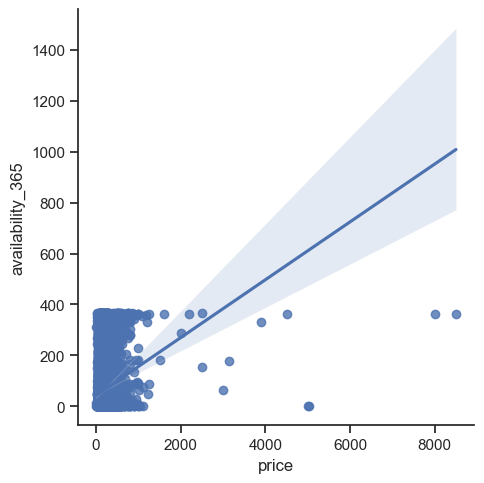

In [70]:
# Plotting a scatterplot between "price" and "availability_365" using seaborn library
scatter1 = sns.lmplot(x = 'price', y = 'availability_365', data = df_sub)
scatter1.figure.savefig(os.path.join(path,'Visualizations','Scatterplot_price_availability.png'), bbox_inches='tight')

This confirms of the hypothesis that lower the price of the listing, lesser the count of Availability_365. The linear plot is also quite positive. This signifies that the people looking for renting houses in Amsterdam are price sensitive, this might be because of the Tourist scenario and also the average price of the housing being higher in Amsterdam as compared to the overall Europe(Schengen) area.

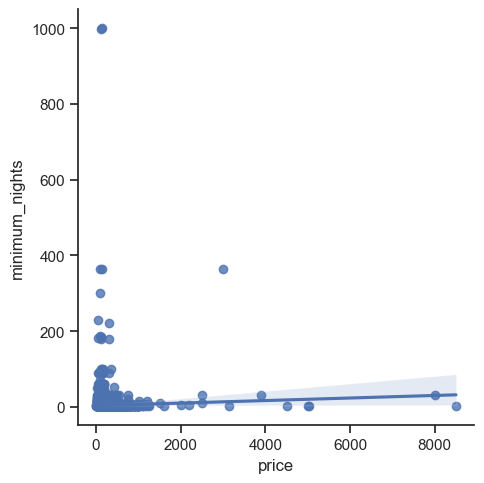

In [71]:
#plotting a scatterplot between "price" and "minimum_nights" using seaborn library
scatter2 = sns.lmplot(x = 'price', y = 'minimum_nights', data = df_sub)
scatter2.figure.savefig(os.path.join(path,'Visualizations','Scatterplot_price_minimum_nights.png'), bbox_inches='tight')

The relationship between price and minimum_nights are slightly positive. But there are some outliers of properties having higher minimum_nights requirements for booking being of low price. In general, the higher the number of minimum_nights requirements a listing has, lower the price of the listing should be as compared to the average listings with lower minimum night requirements.

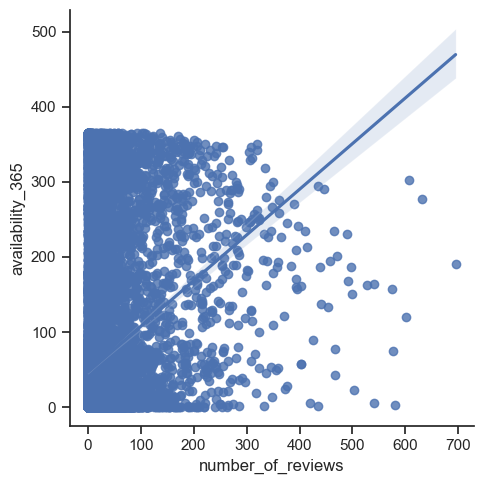

In [72]:
#plotting a scatterplot between "number_of_reviews" and "availability_365" using seaborn library
scatter3 = sns.lmplot(x = 'number_of_reviews', y = 'availability_365', data = df_sub)
scatter3.figure.savefig(os.path.join(path,'Visualizations','Scatterplot_number_reviews_availability.png'), bbox_inches='tight')

There is a clear string linear relationship between number of reviews and availability of the listing. This is very organic relationship in online listing marketplace like Airbnb. we can confirm that more the number of reviews a listing has, the availability of the listing reduces in turn decreasing the count of availability within the dataset.

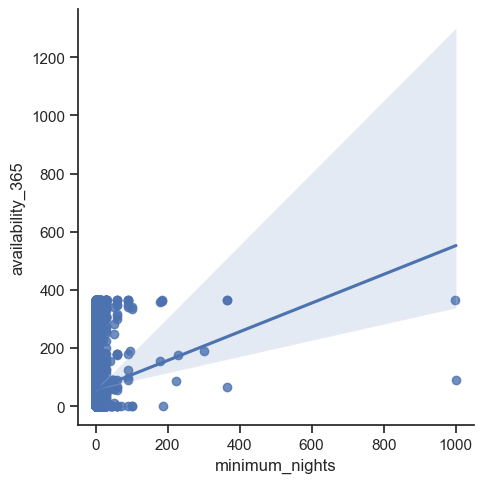

In [79]:
#plotting a scatterplot between "minimum_nights" and "availability_365" using seaborn library
scatter4 = sns.lmplot(x = 'minimum_nights', y = 'availability_365', data = df_sub)
scatter4.figure.savefig(os.path.join(path,'Visualizations','Scatterplot_minimum_nights_availability.png'), bbox_inches='tight')

We can confirm that lesser the minimum number of nights requirement for the listing, the days of availability of the listing throughout the calendar year reduces. Hence, the hosts listing their properties should try to keep the minimum number of nights requirement to a lesser value to maximimze the profit of the listings rent in Airbnb.

**Pair plots**

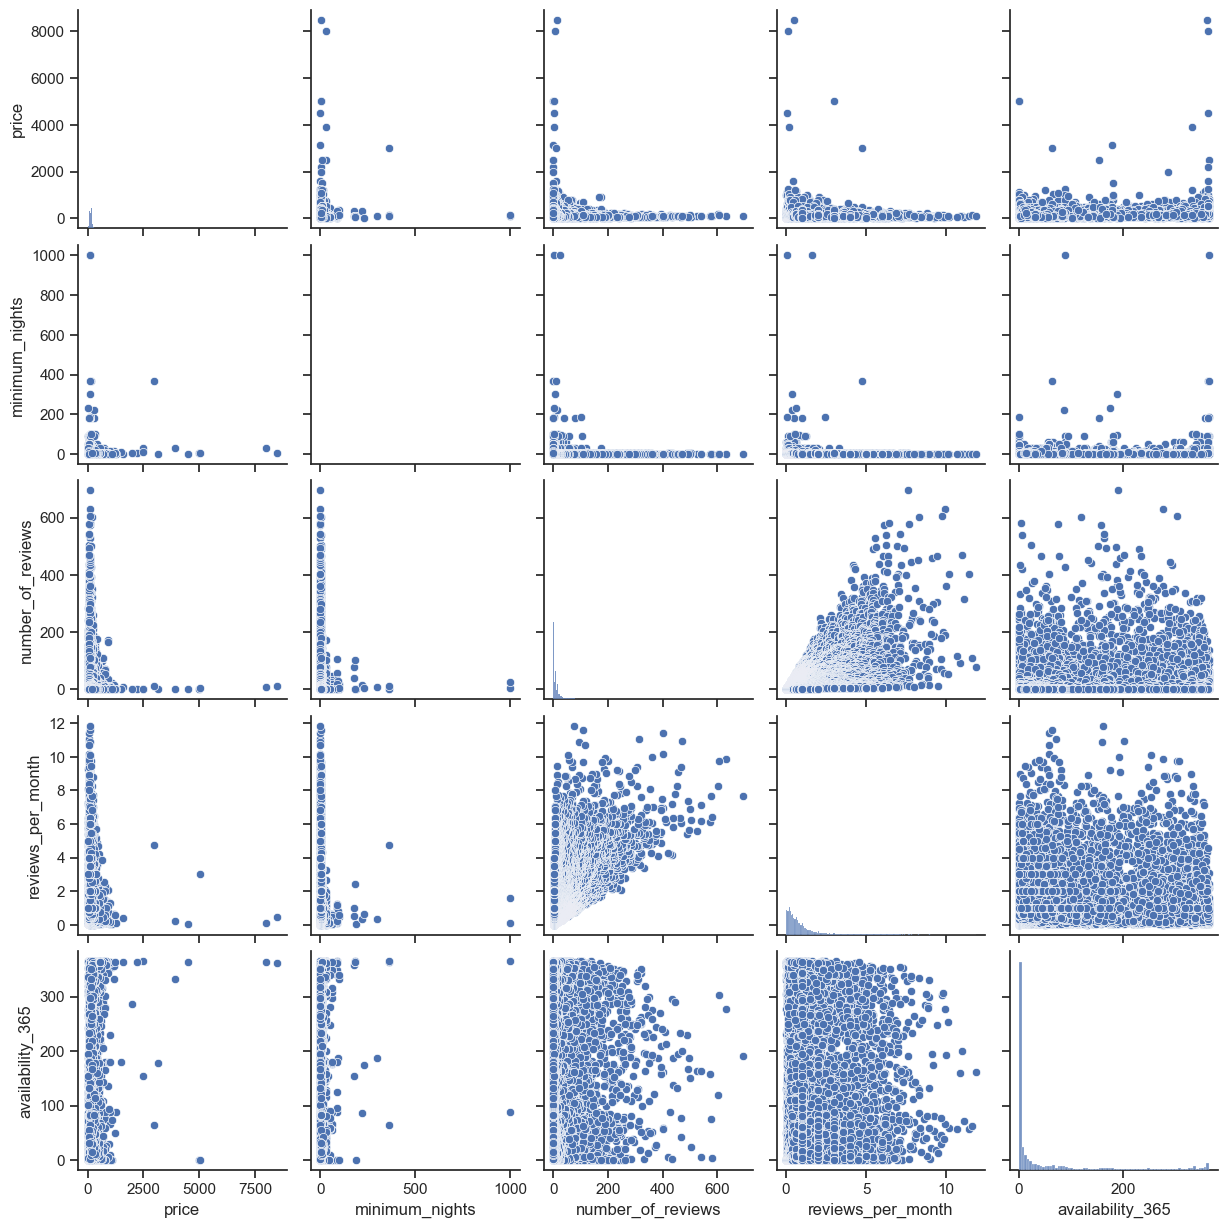

In [73]:
# Creating a pair plot
g = sns.pairplot(df_sub)
g.figure.savefig(os.path.join(path,'Visualizations','Pair_plots.png'), bbox_inches='tight')

The distribution of variables around scatterplots is confusing around the price variable. The majority of the variables within the price scatterplot seems to be around the lower end. This should be investigated further.

The availability variable is a strong relationship with the number of reviews and the minimum nights as we confirmed during the scatterplots. The histogram of all the variables are not clear within the pair plots, hence I will plot the histogram plots for price and availability_365.

**Histogram plot**

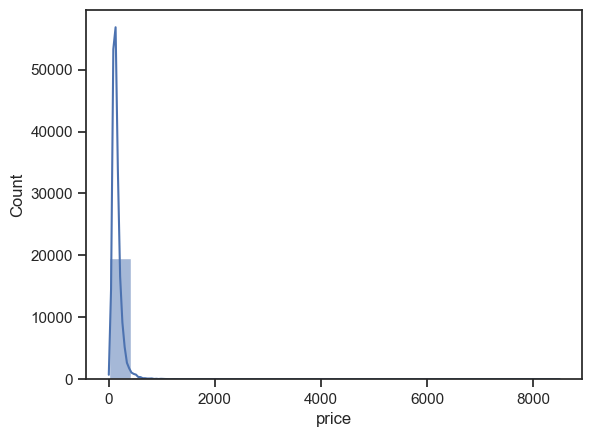

In [74]:
# Creating a histogram for the price variable
price_histplot = sns.histplot(df_sub['price'], bins = 20 , kde = True)
price_histplot.figure.savefig(os.path.join(path,'Visualizations','Histogram_price.png'), bbox_inches='tight')

As we can see from the above histogram plot, the chart is heavily right skewed. This might be because of the outlier values of the higher price listings. Lets check the histogram with subset of the prices values with removing the outliers.

In [40]:
#Creating a subset of the dataset with removing the outliers
df_sub_price = df_sub.loc[df_sub['price'] < 500]

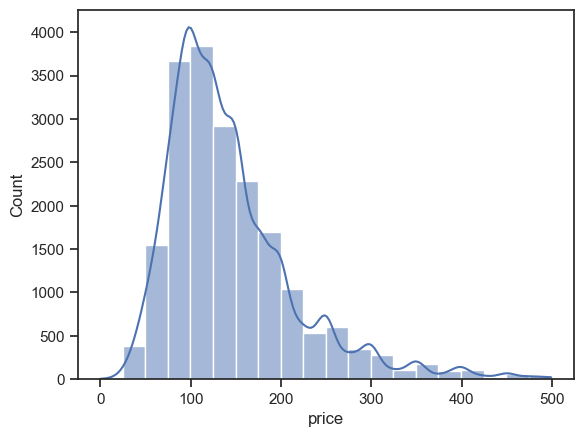

In [75]:
# Creating a histogram for the price variable in the new subset of the dataset
price_sub_histplot = sns.histplot(df_sub_price['price'], bins = 20 , kde = True)
price_sub_histplot.figure.savefig(os.path.join(path,'Visualizations','HistPlot_new_price.png'), bbox_inches='tight')

The values of price are collected towards the lower price values and hence, the distribution is heavily right skewed. This might be the reason for all variables not being viewed properly in the pair plot histogram charts.

**Categorical Plots**

**Creating a categorical variable that splits the "Price" column into categories**

<AxesSubplot: xlabel='price', ylabel='Count'>

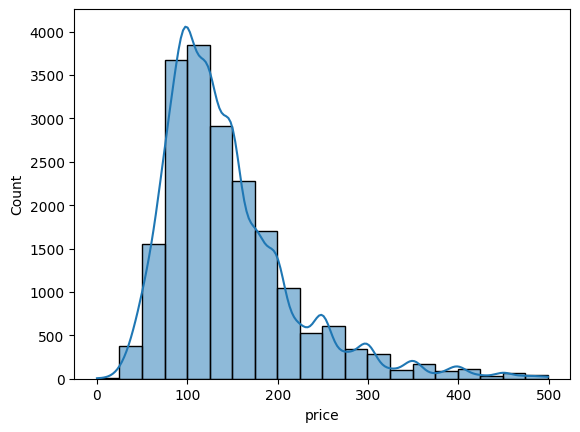

In [42]:
# Creating a histogram for the price variable in the dataset
sns.histplot(df_sub_price['price'], bins = 20 , kde = True)

In [52]:
df_sub_price.loc[df_sub_price['price'] < 125, 'Price category'] = 'Low price'

In [53]:
df_sub_price.loc[(df_sub_price['price'] >= 125) & (df_sub_price['price'] <300), 'Price category'] = 'Medium price'

In [54]:
df_sub_price.loc[df_sub_price['price'] >= 300, 'Price category'] = 'High price'

In [55]:
df_sub_price['Price category'].value_counts(dropna = False)

Low price       9449
Medium price    9415
High price       901
Name: Price category, dtype: int64

In [56]:
df_sub_price.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365', 'Price category'],
      dtype='object')

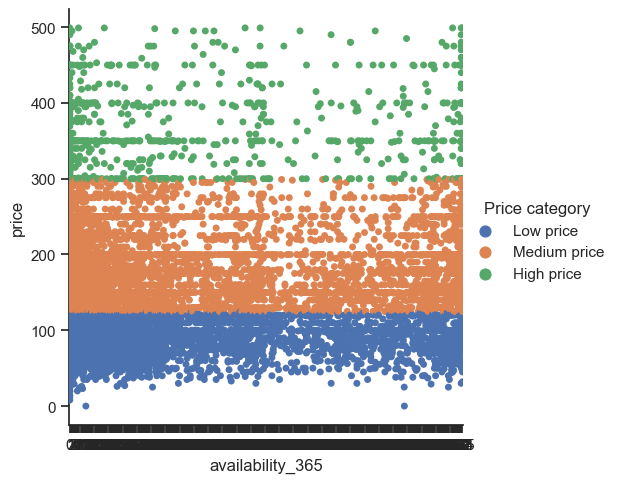

In [76]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
ng = sns.catplot(x="availability_365", y="price", hue="Price category", data=df_sub_price)
ng.figure.savefig(os.path.join(path,'Visualizations','Catplot_price.png'), bbox_inches='tight')

Have performed the categorical plots on the price variable within the subset of the dataset excluding the outliers. This plot shows that the availability of the listing matters on the price of the listing. We can conclude that the High price listings would be more available within the Airbnb. The low and the medium price would be less available since the people are price sensitive towards listings with good price range.

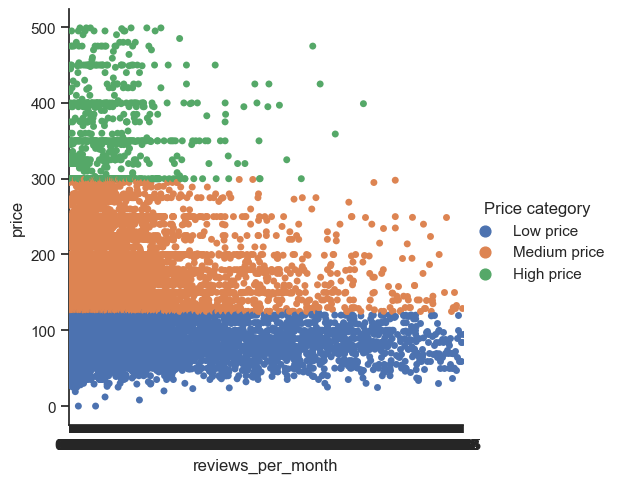

In [77]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
eg = sns.catplot(x="reviews_per_month", y="price", hue="Price category", data=df_sub_price)
eg.figure.savefig(os.path.join(path,'Visualizations','Catplot_price_reviews.png'), bbox_inches='tight')

From the categorical plot, we can see that the reviews_per_month is very important to Low and medium price listings and does not matter to the High price listings. This might be because of the quality of the house listings of high price and the neighborhood the listings are in. 

**Important Questions**

1) What is the relationship between the number of reviews and the availability of the listings?

There is a clear string linear relationship between number of reviews and availability of the listing. This is very organic relationship in online listing marketplace like Airbnb. we can confirm that more the number of reviews a listing

2) How does the variable minimum number of nights affect the availability variable?

We can confirm that lesser the minimum number of nights requirement for the listing, the days of availability of the listing throughout the calendar year reduces. Hence, the hosts listing their properties should try to keep the minimum number of nights requirement to a lesser value to maximimze the profit of the listings rent in Airbnb.

3) How does the variable minimum number of nights affect the price of the listing?

The relationship between price and minimum_nights are slightly positive. But there are some outliers of properties having higher minimum_nights requirements for booking being of low price. In general, the higher the number of minimum_nights requirements a listing has the lower the price of the listing should be as compared to the average listings with lower minimum night requirements.

**New questions found during the Visualization Analysis**

1) What is the relationship between price and monthly number of reviews of the listing?

From the categorical plot, we can see that the reviews_per_month is very important to Low and medium price listings and does not matter to the High price listings. This might be because of the quality of the house listings of high price and the neighborhood the listings are in. 

# Hypothesis

Following the Visualization Analysis done throughout this exercise and the price category being setup as low, medium and high price listings categories, I can come up with the following hypothesis:

1) For low and medium price listings, the availability of the listings would be lower throughout the calendar year. For higher price listings, the availability value of the listing is not affected by the price.

2) Lower the minimum number of nights requirement for the listing, the renting of listings goes well andthe days of availability of the listing throughout the calendar year will reduce.

3) More the number of reviews a listing has, chances of renting the posted listing increases and also the availability value of the listing reduces throughout the calendar year. 